In [3]:
import pandas as pd
import numpy as np
import tushare as ts
from DataRead import Read
from Tactic import MACD, SMA

In [77]:
import Plot

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

%matplotlib inline

In [55]:
token='2a1fb46d14d3e715f95e4b25cf9cc02bd4d768a4f09b6ec45f389179'
pro=ts.pro_api(token)

In [97]:
df = pro.daily(ts_code='000001.SZ', start_date='20200101', end_date='20211231')

s_date='2021-1-1'
e_date='2021-10-28'

df['trade_date']=pd.to_datetime(df['trade_date'])
df.set_index('trade_date',inplace=True)
df.sort_index(ascending=True,inplace=True)

sma=SMA()
macd=MACD()

short_flag=True

df_sma=sma.sma_tac(df=df,sma1=12,sma2=26,enable_short=short_flag)
df_dea=macd.dea_tac(df=df,short=12,long=26,median=9,enable_short=short_flag)
df_ema=macd.ema_tac(df=df,short=12,long=26,median=9,enable_short=short_flag)

df_sma_test=df_sma[s_date:e_date].copy()
df_sma_test=sma.complete_returns(df_sma_test)

df_ema_test=df_ema[s_date:e_date].copy()
df_ema_test=macd.complete_returns(df_ema_test)

df_dea_test=df_dea[s_date:e_date].copy()
df_dea_test=macd.complete_returns(df_dea_test)

ema={
    'tac_name':'ema',
    'price_return':macd.base_return(df_ema_test),
    'strategy_return':macd.tac_return(df_ema_test),
    'price_drawdown':macd.max_price_drop(df_ema_test),
    'strategy_drawdown':macd.max_tac_drawdown(df_ema_test),
    
}


dea={
    'tac_name':'dea',
    'price_return':macd.base_return(df_dea_test),
    'strategy_return':macd.tac_return(df_dea_test),
    'price_drawdown':macd.max_price_drop(df_dea_test),
    'strategy_drawdown':macd.max_tac_drawdown(df_dea_test),
    
}

sma={
    'tac_name':'sma',
    'price_return':sma.base_return(df_sma_test),
    'strategy_return':sma.tac_return(df_sma_test),
    'price_drawdown':sma.max_price_drop(df_sma_test),
    'strategy_drawdown':sma.max_tac_drawdown(df_sma_test),
    
}

res=pd.DataFrame([ema,dea,sma])

In [98]:
res

,tac_name,price_return,strategy_return,price_drawdown,strategy_drawdown
0,ema,0.060215,0.094716,-0.0672,-0.0231
1,dea,0.060215,0.220379,-0.0672,-0.0231
2,sma,0.060215,-0.046801,-0.0672,-0.1253


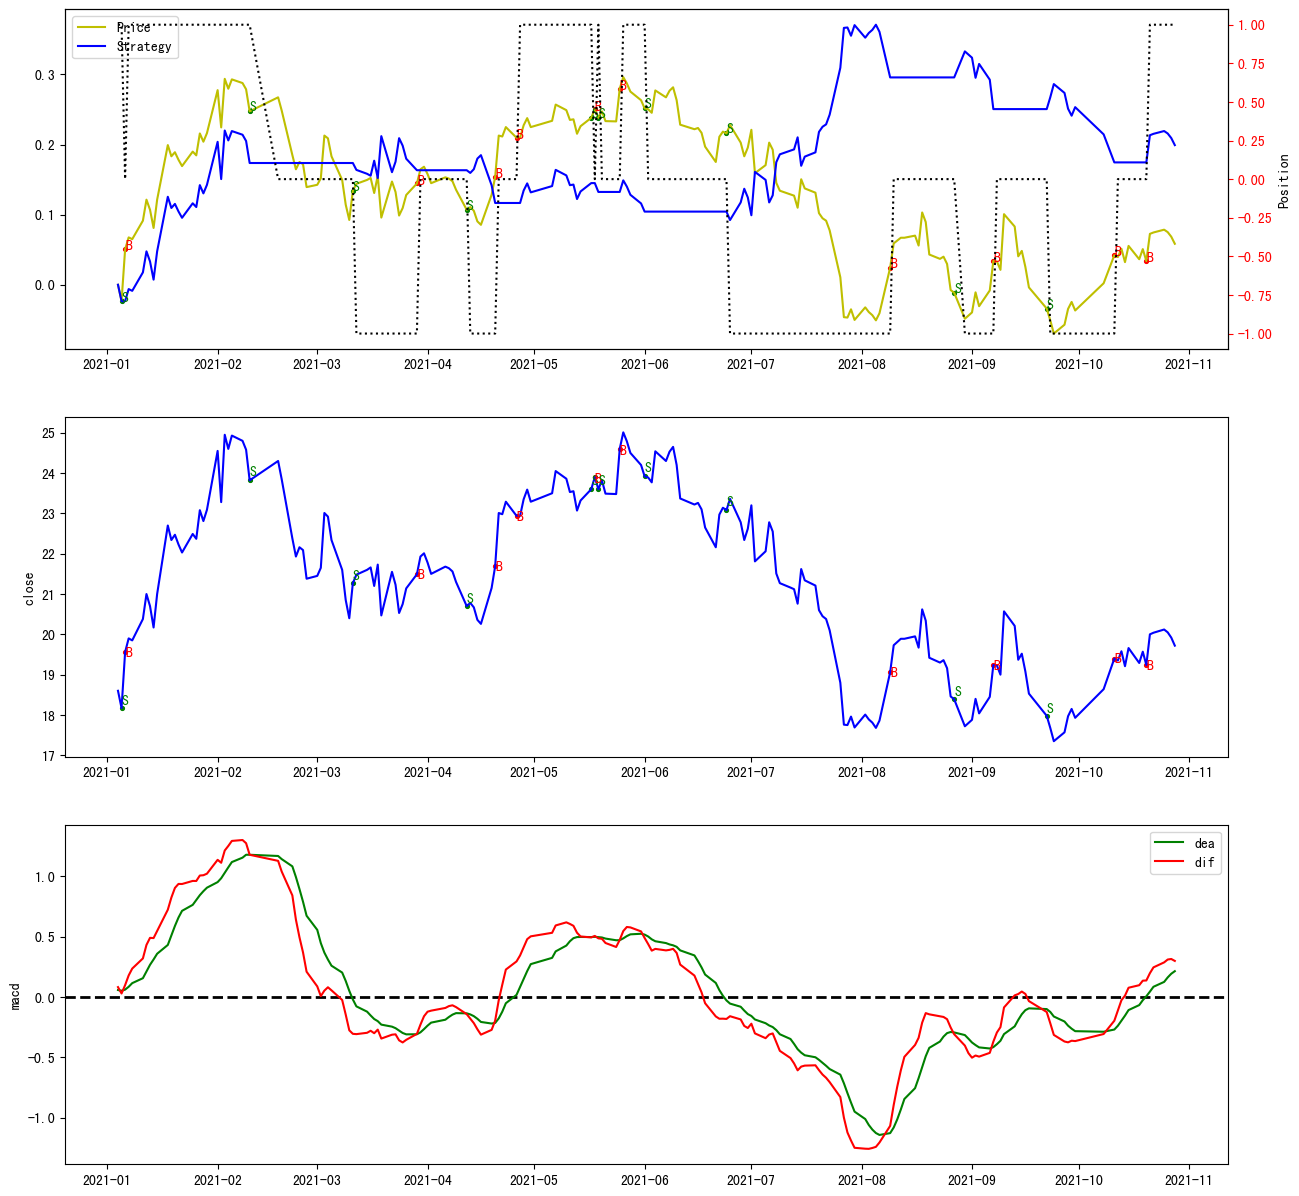

In [95]:
Plot.plot_dea_return(df=df_dea_test)